**Student:** Sanja Tica IT80/2019


**Zadatak:** Detekcija brodova

**Sadržaj sveske:**


*   Uvod
*   Opis problema
*   Prijedlog riješenja
*   Metrike
*   Zaključak
*   Reference















**UVOD**
1. **Računarska vizija**

Računarska vizija je oblast vještačke inteligencije (*Artifical Intelligence*) koja omogućava računarima i sistemima da izvlače značajne informacije iz digitalnih slika, video zapisa i drugih vizuelnih ulaza, te da na osnovu tih informacija preduzimaju neke konkretne akcije.

Računarska vizija funkcioniše slično ljudskom vidu, sa razlikom u tome što ljudi imaju mogućnost razlikovanja objekata, procjene udaljenosti, prepoznavanja kretanja, te nekih drugih smislenih radnji.
U slučaju računarske vizije, mašine treba da obave ovaj zadatak, samo znatno brže, koristeći se konceptima računarsko-komunikacionih tehnologija, kao što su razni algoritmi, kamere i senzori, a ne očima i mozgom, te brojnim nervima, koji su glavni alati u slučaju ljudskog vida.

Računarska vizija se koristi u različitim industrijama, od energetike i komunalnih usluga do proizvodnje i automobilske industrije - i tržište nastavlja da raste. [1]

2. **Osnovi zadaci računarske vizije**

Neki od osnovnih zadataka računarske vizije su:


*   Klasifikacija slika
*   Detekcija objekata
*   Praćenje objekata
*   Pretraga slika na osnovu sadržaja
*   Segmentacija [1]

**OPIS PROBLEMA**

U ovom konkretnom primjeru, obrađen je jedan od prethodno navedenih zadataka, a to je **detekcija objekata** na slikama, preciznije detekcija brodova, stoga će ovaj zadatak biti detaljnije objašnjen u nastavku.

3. **Detekcija objekata**

Detekcija objekata je važan dio računarske vizije. Riješava se upotrebom algoritama mašinskog učenja za identifikaciju objekata i instanci objekata na slikama, video zapisima, te drugim video materijalima. Pod objektima može se podrazumjevati bilo šta, preko ljudi ili njihovih lica, životinja, automobila, te mnogih drugih fizičkih entiteta [2].

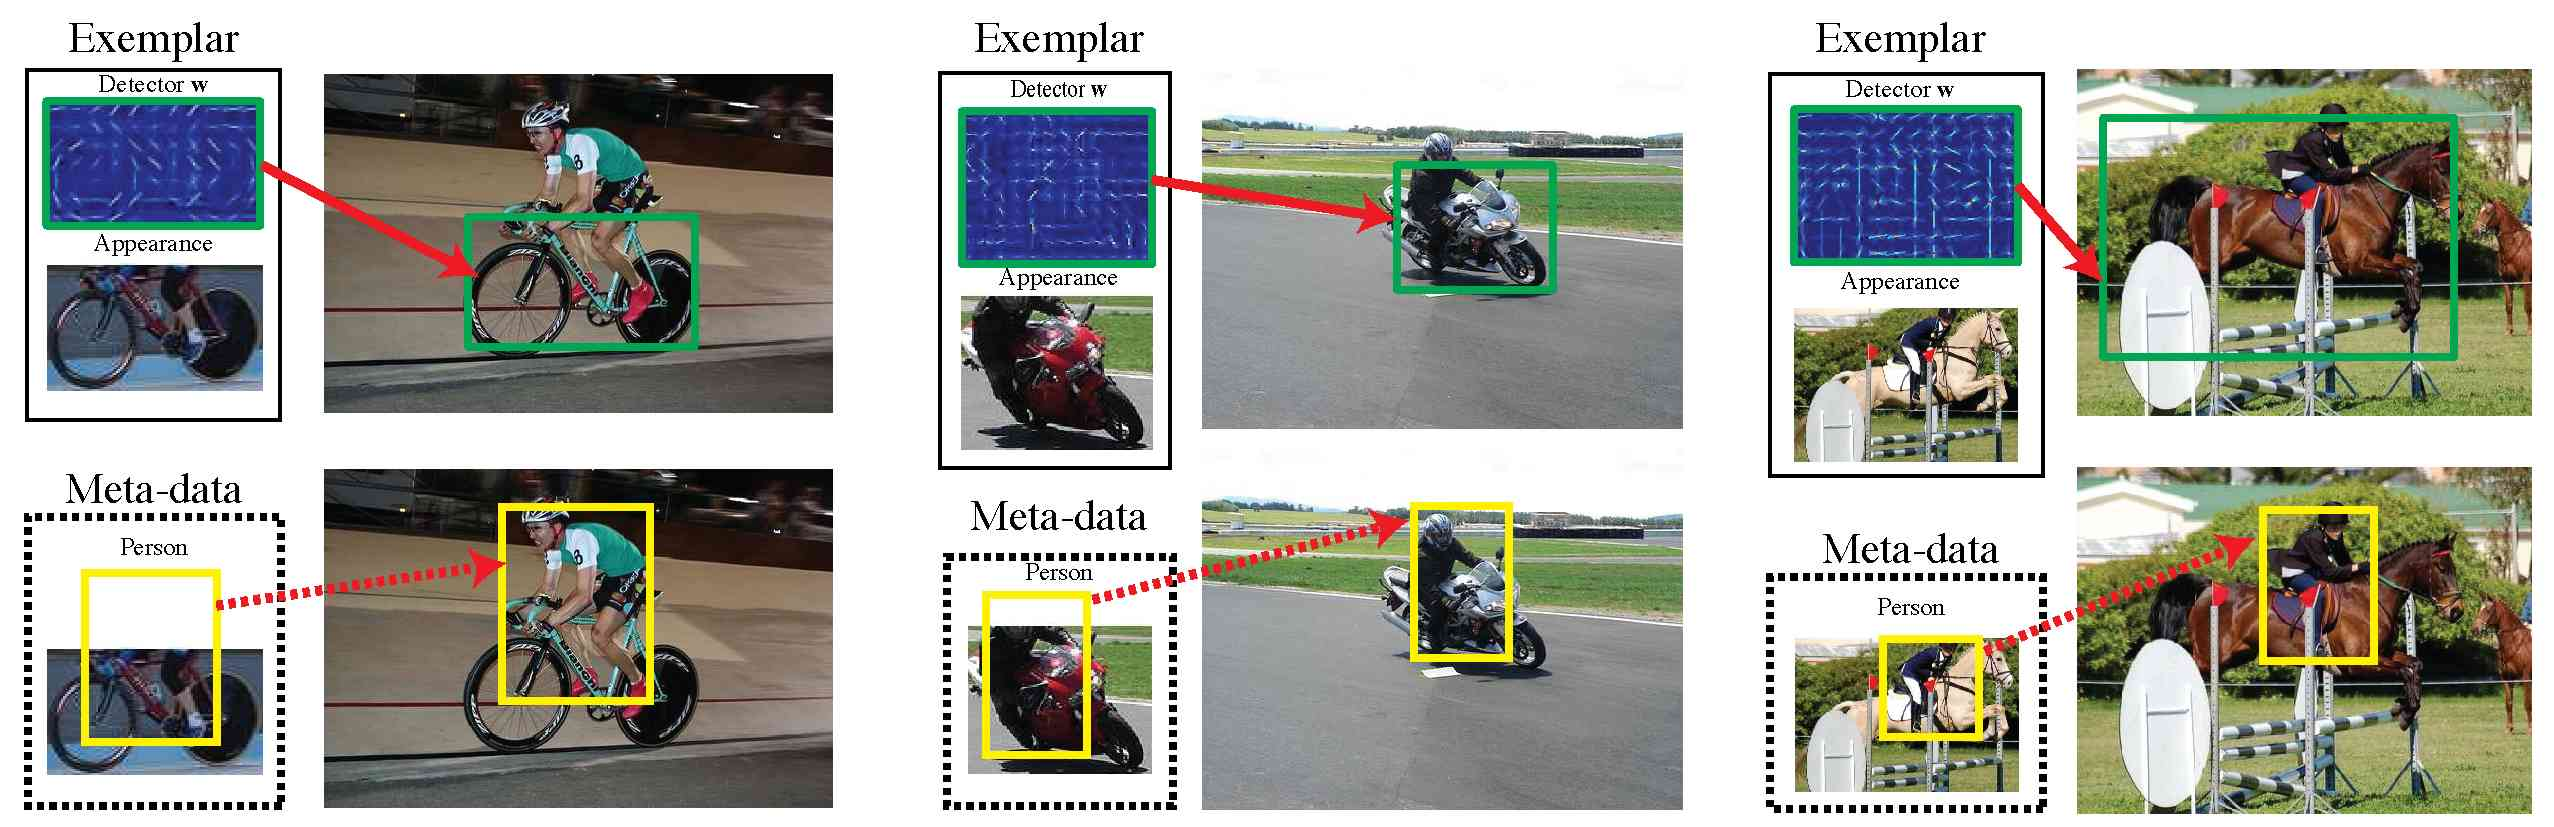


Postoje razlike između detekcije i drugih iznad pomenutih zadataka.

**Razlike između detekcije i klasifikacije**

Detekcija objekata ima dvojaku ulogu, identifikaciju objekata i njihovo precizno lociranje, a klasifikacija se fokusira samo na označavanje slika ili nekih određenih regiona. Detekcija koristi koncept bounding boxes, kako bi odredila tačnu lokaciju objekta a u slučaju klasifikacije, sve se svodi samo na oznake, bez potrebe za lociranjem, pa je samim tim detekcija složeniji zadatak, koji zahtjeva više resursa te specijalizovanije i naprednije algoritme [3].

**Razlika između detekcije i semantičke segmentacije**

Semantička segmentacija dijeli piksele slika u odgovarajuće klase, dok detekcija pored klasifikacije dijelova slike generiše i okvire oko svakog od tih dijelova [4].











Prvi korak jeste učitavanje seta podataka i odgovarajućih csv fajlova u *jupyter notebook*.

Obzirom da je set smješten na *Google Drive*-u, neophodno je prvo skinuti biblioteku koja će mu omogućiti pristup:

In [47]:
from google.colab import drive

In [48]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Zatim je povezana sveska sa google drive nalogom.

In [49]:
!pip install gdown

In [50]:
import gdown

Da bi se podaci uspješno preuzeli u okviru ove sveske, neophodno je na neki način pristupiti im na *Google Drive*-u, gdje su i smješteni. Obzirom da je u pitanju .rar format fajla, za njegovo raspakivanje neophodno je prvo instalirati biblioteku rarfile, te se zatim referencirati na fajl koji želimo da raspakujemo na drajvu, nad kojim se zatim poziva metoda extractAll(), koja će pronađene fajlove raspakovati u radnu sesiju ove sveske, koji postoje sve dok traje ta sesija, a kada se sesija završi svi sačuvani podaci se brišu.

In [51]:
!pip install rarfile


In [53]:
import rarfile

# Putanja do RAR arhive na Google Drive-u
rar_path = '/content/drive/MyDrive/Ships_Detection.rar'

# Putanja do direktorijuma u kojem želite da sačuvate raspakovane fajlove
destination_path = '/content/working'

# Otvaranje RAR arhive
rar = rarfile.RarFile(rar_path)

# Raspakivanje svih fajlova iz arhive
rar.extractall(destination_path)


KeyboardInterrupt: ignored

**RIJEDLOG RIJEŠENJA: IMPLEMENTACIJA POMOĆU MASK-RCNN-a**

Mask R-CNN (***Mask Region-based Convolutional Neural Network***) je
napredni model dubokog učenja za detekciju objekata i segmentaciju
instanci. Ovaj model predstavlja proširenje Faster R-CNN modela, koji kombinuje detekciju objekata i generisanje prijedloga regija. Mask R-CNN dodatno proširuje ovaj okvir dodavanjem grane za segmentaciju piksela na nivou objekata.

Model radi tako što generiše prijedloge regija, poboljšava te prijedloge i zatim klasifikuje objekte i generiše segmentacione maske za svaki detektovani objekat.

Mask R-CNN je vrlo efikasan i precizan model koji se često koristi u različitim aplikacijama računarske vizije, kao što su prepoznavanje objekata, autonomna vožnja, medicinska slikovna dijagnostika i mnoge druge [5].

Prvo je neophodno importovanje biblioteka koje ce se koristiti za rad sa podacima. Neke od najvažnijih su:


*   ***NumPy***: biblioteka koja se često koristi u mašinskom učenju, a najčešće služi za rad sa nizovima ili matricama/višedimenzionalnim nizovima i uključuje veliki broj operacija za rad nad tim nizovima, te brojne matematičke i logičke operacije, manipulacije oblicima, diskretne Furijeve transformacije, osnovne statičke operacije i slično [6].
*   ***pandas:*** pandas je paket koji pruža fleksibilne i efikasne strukture podataka dizajnirane da olakšaju rukovanje sa relacionim podacima. Ima mogućnost rada sa različitim tipovima podataka, kao što su tabelarni (npr. Excel ili SQL tabele), proizvoljni matrični podaci, te bilo koji vid opservacijskih/statističkih podataka [7].
*   ***skimage:*** predstavlja kolekciju algoritama koji se koriste za obradu slika. Najpoznatiji paket među svim koje ova kolekcija pruža jeste *scikit-learn*, loja pruža mnoge algoritme za klasifikaciju, regresiju, klasterovanje [8]...
*  *** matplotlib:*** predstavlja biblioteku koja se koristi za vizualizaciju podataka. Omogućava izradu raznih grafičkih reprezentacija, uključujući stubičaste ili tačkaste grafikone, histograme i sl. te na taj način omogućava kreativno i fleksibilno prikazivanje podataka [9].







In [102]:
import os
import sys
import random
import math
import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt
import json
from imgaug import augmenters as iaa
from tqdm import tqdm
import pandas as pd
import glob
import numpy as np
import pandas as pd
from skimage.io import imread
from matplotlib.cm import get_cmap
from skimage.segmentation import mark_boundaries
from skimage.util import montage
from skimage.morphology import binary_opening, disk, label
import gc; gc.enable()

Zatim je potrebno skinuti već postojeću biblioteku Mask-RCNN, koja predstavlja osnovu riješenja, a koja će se dalje prilagođavati ovom konkretnom problemu:




In [ ]:
!git clone https://github.com/maxw1489/Mask_RCNN.git
os.chdir('Mask_RCNN')

Potom se vrši uvoz (import) različitih modula i klasa iz biblioteke Mask RCNN.



In [ ]:
sys.path.append(os.path.join('Mask_RCNN'))  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Ovaj dio koda koristi se za preuzimanje prethodno treniranih COCO težina za Mask RCNN model, koji mogu biti korišćeni kao inicijalne težine za dalji trening ili za primjenu modela na novim podacima.

In [ ]:
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls -lh mask_rcnn_coco.h5

COCO_WEIGHTS_PATH = "mask_rcnn_coco.h5"

Da bi rad sa podacima bio moguć, neophodno je učitavanje seta podataka u svesku.
Podaci se radi preglednosti razdvajaju u posebne direktorijume, podaci za trening i podaci za testiranje.

In [54]:
data_dir = '/content/working/Ships_Detection'
main_dir = '/content/working/'
train_dir = os.path.join(data_dir, 'train_v2')
test_dir = os.path.join(data_dir, 'test_v2')

**Analiza seta**

In [86]:
import os

train_images = os.listdir(train_dir)
num_train_images = len(train_images)

test_images = os.listdir(test_dir)
num_test_images = len(test_images)

print("Broj slika za obuku:", num_train_images)
print("Broj slika za testiranje:", num_test_images)


Broj slika za obuku: 7981
Broj slika za testiranje: 6872


Ćelija iznad prikazuje koliko ukupno postoji slika u setu za trening i testiranje, a ćelija ispod prikazuje sadržaj oba csv fajla iz seta podataka u formi tabele.

In [88]:
import pandas as pd
import os

# Putanje do CSV datoteka
csv_file1 = os.path.join('/content/working/Ships_Detection', 'sample_submission_v2.csv')
csv_file2 = os.path.join('/content/working/Ships_Detection', 'train_ship_segmentations_v2.csv')

# Učitavanje CSV datoteka u Pandas DataFrame
df1 = pd.read_csv(csv_file1)
df2 = pd.read_csv(csv_file2)

# Prikaz sadržaja DataFrame objekata
print("\nSadržaj sample_submission_v2.csv:")
print(df1)

print("\nSadržaj train_ship_segmentations_v2.csv:")
print(df2)



Sadržaj sample_submission_v2.csv:
             ImageId EncodedPixels
0      00002bd58.jpg           1 2
1      00015efb6.jpg           1 2
2      00023d5fc.jpg           1 2
3      000367c13.jpg           1 2
4      0008ca6e9.jpg           1 2
...              ...           ...
15601  ffdb3cda6.jpg           1 2
15602  ffe3857eb.jpg           1 2
15603  ffeb765e8.jpg           1 2
15604  ffeba1475.jpg           1 2
15605  fff0fd44f.jpg           1 2

[15606 rows x 2 columns]

Sadržaj train_ship_segmentations_v2.csv:
              ImageId                                      EncodedPixels
0       00003e153.jpg                                                NaN
1       0001124c7.jpg                                                NaN
2       000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3       000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4       000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...               ...                  

In [89]:
import pandas as pd

# Učitavanje CSV fajla sa podacima o treningu
train_csv = '/content/working/Ships_Detection/train_ship_segmentations_v2.csv'
df_train = pd.read_csv(train_csv)

# Analiza raspodjele klasa
class_counts = df_train['EncodedPixels'].notnull().value_counts()

# Prikaz rezultata
print("Raspodjela klasa:")
print(class_counts)


Raspodjela klasa:
False    150000
True      81723
Name: EncodedPixels, dtype: int64


Brisanje, odnosno isključivanje određenih fotografija iz seta podataka za obradu, koje su oštećene:

In [55]:
from PIL import Image

from sklearn.model_selection import train_test_split
exclude_list = ['6384c3e78.jpg','13703f040.jpg', '14715c06d.jpg',  '33e0ff2d5.jpg',
                '4d4e09f2a.jpg', '877691df8.jpg', '8b909bb20.jpg', 'a8d99130e.jpg',
                'ad55c3143.jpg', 'c8260c541.jpg', 'd6c7f17c7.jpg', 'dc3e7c901.jpg',
                'e44dffe88.jpg', 'ef87bad36.jpg', 'f083256d8.jpg'] #corrupted images

def filter_file_names(directory, exclude_list):
    file_names = []
    with os.scandir(directory) as entries:
        for entry in entries:
            if entry.is_file() and entry.name not in exclude_list:
                file_names.append(entry.name)
    return file_names

train_names = filter_file_names(train_dir, exclude_list)
test_names = filter_file_names(test_dir, exclude_list)

print(len(train_names), len(test_names))

7981 6872


Radi preglednosti označena je opcija kojom se isključuje debagovanje, odnosno u ovom slučaju ispisivanje dodatnih informacija i debagovanja.

In [56]:
debug = False

Zatim se prethodno "izvučeni" podaci iz seta pretvaraju u pandas dataframe-ove, pa zatim upisuju u cvs datoteke, radi olakšane daljnje manipulacije nad podacima.

In [57]:
df = pd.DataFrame({'File Name': train_names})

df.to_csv('/content/working/train_names.csv', index=False)


df = pd.DataFrame({'File Name': test_names})


df.to_csv('/content/working/test_names.csv', index=False)


Sledeći korak je učitavanje prethodno generisanih csv fajlova,  koristeći *pd.read_csv()* funkciju iz *pandas* biblioteke.

In [58]:
df = pd.read_csv('/content/working/train_names.csv')

train_names1 = df['File Name']


df = pd.read_csv('/content/working/test_names.csv')

test_names1 = df['File Name']

print(len(train_names1), len(test_names1))

7981 6872


U ovom dijelu koda prikazanom ispod se vrši filtriranje dostupnih slika na osnovu podataka iz CSV datoteke koja sadrži segmentacije brodova.

In [59]:

image_folder = '/content/working/Ships_Detection/train_v2'


csv_file = '/content/working/Ships_Detection/train_ship_segmentations_v2.csv'

image_names = [os.path.splitext(filename)[0] + '.jpg' for filename in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, filename))]

data = pd.read_csv(csv_file)

filtered_data = data[data['ImageId'].isin(image_names)]

filtered_data.to_csv('/content/working/train_ship_segmentations_v3.csv',index=False)

Sledeća ćelija vrši učitavanje CSV datoteke train_ship_segmentations_v3.csv koja sadrži informacije o segmentacijama brodova za trening skup podataka.

In [60]:
# training dataset
rle = '/content/working/train_ship_segmentations_v3.csv'
annotations = pd.read_csv(rle)
annotations.shape

(9681, 2)

Ova linija koda se koristi za povezivanje imena fajlova sa odgovarajućim informacijama o segmentacijama brodova, kako bi se te informacije mogle koristiti prilikom treniranja ili analize podataka.

In [61]:
im_names, image_annotations = train_names1, annotations

Dio koda u narednoj ćeliji vrši čitanje jedne slike iz fajla te njeno prikazivanje.


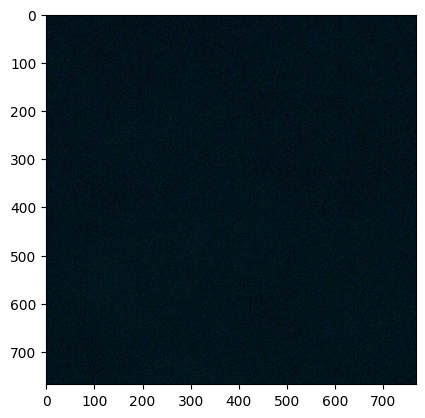

In [62]:
ds = imread(os.path.join(train_dir, im_names[0]))
_ = plt.imshow(ds)

Postavljamo veličinu slike na njenu originalnu.

In [63]:
ORIG_SIZE = 768


**KREIRANJE MODELA**

In [64]:
class ModelConfig(Config):

    NAME = 'Initial'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 8

    BACKBONE = 'resnet50'

    NUM_CLASSES = 2

    IMAGE_MIN_DIM = 384
    IMAGE_MAX_DIM = 384
    #RPN_ANCHOR_SCALES = (8, 16, 32, 64)  #different window sizes in RPN achors
    TRAIN_ROIS_PER_IMAGE = 64
    MAX_GT_INSTANCES = 2
    DETECTION_MAX_INSTANCES = 15
    DETECTION_MIN_CONFIDENCE = 0.85
    DETECTION_NMS_THRESHOLD = 0.0
    RUN_EAGERLY = False

    STEPS_PER_EPOCH = 15 if debug else 5
    VALIDATION_STEPS = 10 if debug else 3

    LOSS_WEIGHTS = {
        "rpn_class_loss": 30.0,
        "rpn_bbox_loss": 0.8,
        "mrcnn_class_loss": 6.0,
        "mrcnn_bbox_loss": 1.0,
        "mrcnn_mask_loss": 1.2
    }

config = ModelConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     8
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        15
DETECTION_MIN_CONFIDENCE       0.85
DETECTION_NMS_THRESHOLD        0.0
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 8
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  384
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  384
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [384 384   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 30.0, 'rpn_bbox_loss': 0.8, 'mrcnn_class_loss': 6.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.2}
MASK_POOL_SIZE                 14
MASK_SHAPE             

Obzirom da su u ovom setu definisane segmentacije za svaku od slika, i to u okviru kolone encoded_pixels, u ovkiru train_ship_segmentations csv fajla, neophodno ih je na neki način dekodirati. To je u ovom slučaju urađeno pretvaranjem u numpy nizove, čime je dobijena matrica koja predstavlja masku broda, pri čemu 1 označava prisustvo broda, a 0 je pozadina.

In [65]:
def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

Ovaj kod definiše klasu LoadDataset koja nasleđuje od utils.Dataset klase iz mrcnn biblioteke. Ova klasa se koristi za učitavanje i pripremu podataka za trening modela, koji zahtjeva ulazne slike i pripadajuće segmentacije (maske) brodova.  Metode ove klase se koriste za učitavanje slika, generisanje maski i informacija o klasama, i povezivanje tih podataka sa odgovarajućim ID-jevima slika.

In [66]:
class LoadDataset(utils.Dataset):
    """Dataset class for training our dataset.
    """

    def __init__(self, im_names, image_annotations, orig_height, orig_width):
        super().__init__(self)

        self.add_class('ship', 1, 'Ship')

        for i, fp in enumerate(im_names):
            annotations = image_annotations.query('ImageId=="' + fp + '"')['EncodedPixels']
            self.add_image('ship', image_id=i, path=os.path.join(train_dir, fp),
                           annotations=annotations, orig_height=orig_height, orig_width=orig_width)

    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

    def load_image(self, image_id):
        info = self.image_info[image_id]
        fp = info['path']
        image = imread(fp)
        if len(image.shape) != 3 or image.shape[2] != 3:
            image = np.stack((image,) * 3, -1)
        return image

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        annotations = info['annotations']
#         print(image_id, annotations)
        count = len(annotations)
        if count == 0:
            mask = np.zeros((info['orig_height'], info['orig_width'], 1), dtype=np.uint8)
            class_ids = np.zeros((1,), dtype=np.int32)
        else:
            mask = np.zeros((info['orig_height'], info['orig_width'], count), dtype=np.uint8)
            class_ids = np.zeros((count,), dtype=np.int32)
            for i, a in enumerate(annotations):
                mask[:, :, i] = rle_decode(a)
                class_ids[i] = 1
        return mask.astype(np.bool), class_ids.astype(np.int32)

Zatim se dostupni podaci dijele na trening i validacioni set, sa opcionim ograničenjem broja slika za debagovanje.

In [67]:
from sklearn.model_selection import train_test_split
train_names1 = annotations[annotations.EncodedPixels.notnull()].ImageId.unique().tolist()  ## override with ships

test_size = config.VALIDATION_STEPS * config.IMAGES_PER_GPU
im_names_train, im_names_val = train_test_split(train_names1, test_size=test_size, random_state=42)

if debug:
    im_names_train = im_names_train[:100]
    im_names_val = im_names_val[:100]
    test_names1 = test_names1[:100]

print(len(im_names_train), len(im_names_val), len(test_names1))

1763 24 6872


%%time je Jupyter Magic komanda koja se koristi da bi se izmjerilo vrijeme izvršavanja ćelije. Kada se ova komanda koristi, Jupyter će prikazati vrijeme koje je bilo potrebno da se izvrši ćelija, a ovde omogućava mjerenje vremena potrebnog za izvršavanje cjelokupne ćelije, uključujući pripremu trening skupa podataka.

In [68]:
%%time
dataset_train = LoadDataset(im_names_train, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_train.prepare()

CPU times: user 3.33 s, sys: 63.2 ms, total: 3.39 s
Wall time: 3.45 s


Na sličan način, vrši se priprema i validacionog seta.

In [69]:
%%time
dataset_val = LoadDataset(im_names_val, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_val.prepare()

CPU times: user 65.7 ms, sys: 1.12 ms, total: 66.9 ms
Wall time: 71.7 ms


**TRENING**

In [70]:
model = modellib.MaskRCNN(mode='training', config=config, model_dir=main_dir)


***LEARNING_RATE*** predstavlja vrijednost parametra koji se naziva stopa učenja (learning rate) i koristi se prilikom treniranja modela. Ova vrijednost određuje koliko brzo će se model prilagođavati trening podacima tokom procesa optimizacije. Ovaj dio koda se odnosi na podešavanje vrijednosti parametra stope učenja i postavljanje filtera za upozorenja, što su koraci koji se mogu preduzeti prije treniranja modela kako bi se prilagodile određene postavke ili pružilo čišće izvršavanje bez upozorenja, radi preglednosti [10].

In [71]:
LEARNING_RATE = 0.003

import warnings
warnings.filterwarnings("ignore")

U ćeliji ispod, zadaje se konfiguracija pod kojom se vrši treniranje modela, gdje se learning rate postavlja na 2, kako bi se ubrzao proces učenja, a model se trenira 2 epohe, pri čemu se treniraju samo slojevi koji se odnose na klasifikaciju, regresiju granica okvira (*bounding box*) i predikciju maski (*ROI align*), iz razloga što se obično trening radi tako da se prvo treniraju samo gornji slojevi, a kasnije se nastoji postići *fine tuning*, odnosno treniranje i unutrašnjih slojeva, te postizanje boljih performansi modela.

In [ ]:
%%time
model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE*2,
            epochs=2,
            layers='heads')

history = model.keras_model.history.history

Zatim slijedi postupak *fine tunning*-a, odnosno treniranja svih slojeva.

In [72]:
model.train(dataset_train, dataset_val,
            learning_rate=LEARNING_RATE,
            epochs=2,
            layers='all')

new_history = model.keras_model.history.history



Starting at epoch 0. LR=0.003

Checkpoint Path: /content/working/initial20230707T1803/mask_rcnn_initial_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b     

Prikaz istorije treninga modela:

In [ ]:
history


Ova ćelija koda se koristi za čuvanje objekta new_history (istorije treniranja modela) u fajl history.pkl u binarnom formatu. Ovaj fajl može se kasnije koristiti za analizu i ponovno učitavanje istorije treniranja modela. Iz tog razloga, potreban je import pickle biblioteke za rad sa fajlovima.

In [73]:
import pickle


In [74]:
with open('/content/working/history.pkl', 'wb') as file:
    pickle.dump(new_history, file)

Tablični prikaz istorije modela:

In [75]:
#model 1's history
history = new_history
epochs = range(1, len(history['loss'])+1)
pd.DataFrame(new_history, index=epochs)

,loss,rpn_class_loss,rpn_bbox_loss,mrcnn_class_loss,mrcnn_bbox_loss,mrcnn_mask_loss,val_loss,val_rpn_class_loss,val_rpn_bbox_loss,val_mrcnn_class_loss,val_mrcnn_bbox_loss,val_mrcnn_mask_loss
1,158.220505,149.802582,5.670142,0.243816,1.821835,0.682126,53.629902,47.128967,3.518219,0.626325,1.541195,0.815194
2,48.653358,43.139400,3.419652,0.349490,1.089510,0.655308,45.414257,39.595322,3.669034,0.336208,0.992617,0.821077


Vizuelni prikaz, odnosno iscrtavanje grafika gubitaka (loss) tokom treninga modela:



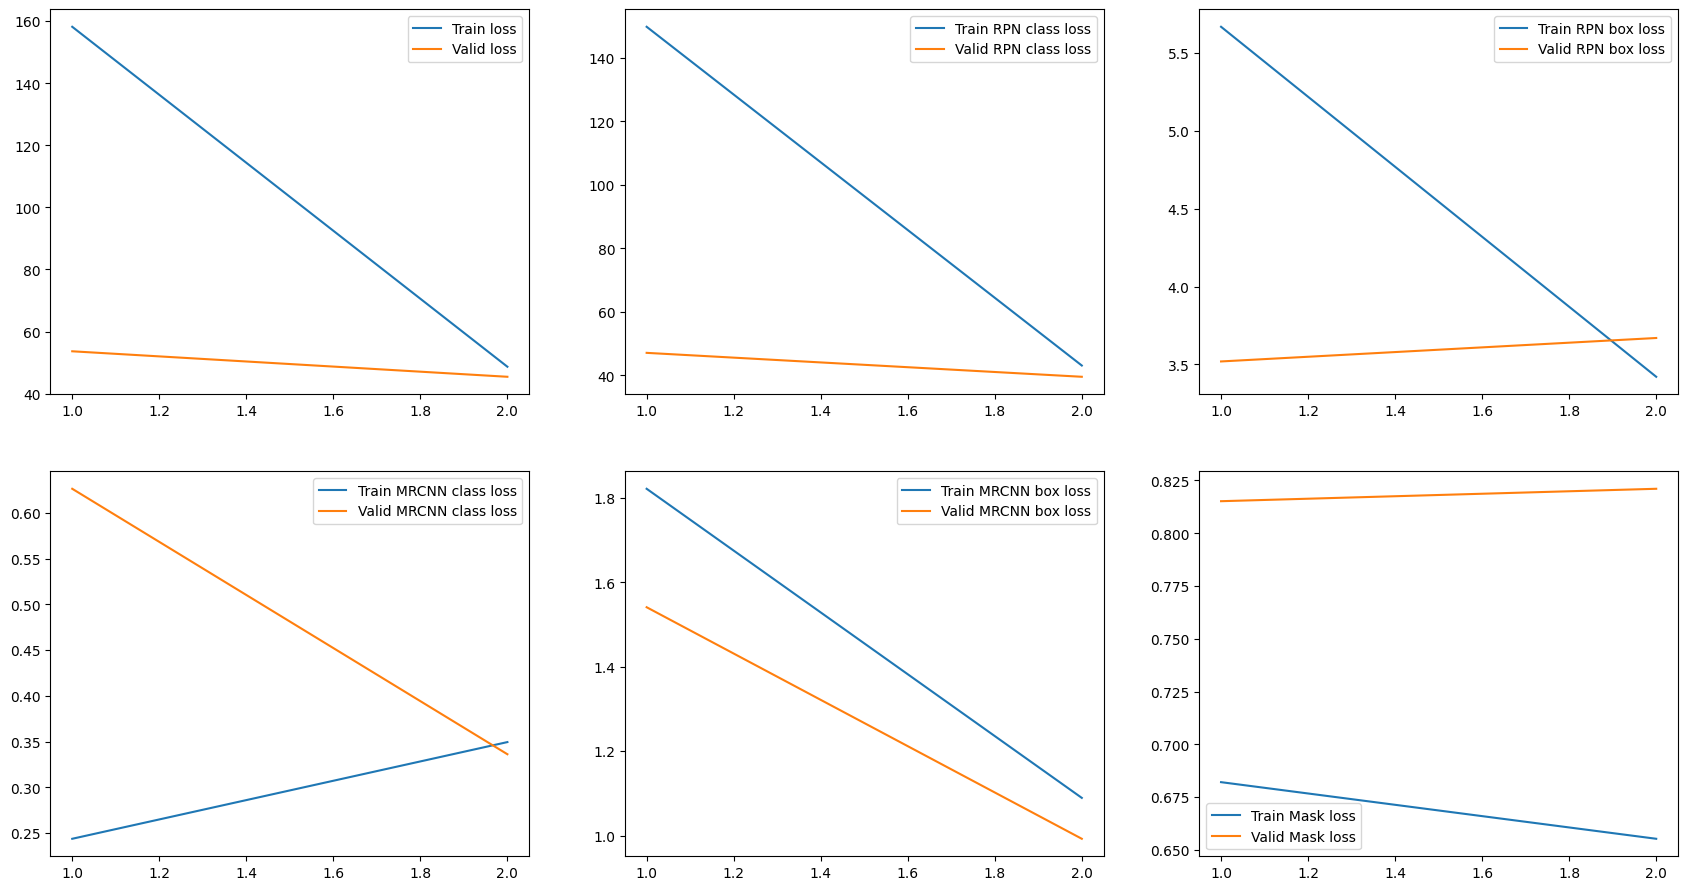

In [76]:
plt.figure(figsize=(21,11))

plt.subplot(231)
plt.plot(epochs, history["loss"], label="Train loss")
plt.plot(epochs, history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(232)
plt.plot(epochs, history["rpn_class_loss"], label="Train RPN class loss")
plt.plot(epochs, history["val_rpn_class_loss"], label="Valid RPN class loss")
plt.legend()
plt.subplot(233)
plt.plot(epochs, history["rpn_bbox_loss"], label="Train RPN box loss")
plt.plot(epochs, history["val_rpn_bbox_loss"], label="Valid RPN box loss")
plt.legend()
plt.subplot(234)
plt.plot(epochs, history["mrcnn_class_loss"], label="Train MRCNN class loss")
plt.plot(epochs, history["val_mrcnn_class_loss"], label="Valid MRCNN class loss")
plt.legend()
plt.subplot(235)
plt.plot(epochs, history["mrcnn_bbox_loss"], label="Train MRCNN box loss")
plt.plot(epochs, history["val_mrcnn_bbox_loss"], label="Valid MRCNN box loss")
plt.legend()
plt.subplot(236)
plt.plot(epochs, history["mrcnn_mask_loss"], label="Train Mask loss")
plt.plot(epochs, history["val_mrcnn_mask_loss"], label="Valid Mask loss")
plt.legend()

plt.show()

Pronalaženje najbolje epohe tokom treniranja modela:

In [77]:
best_epoch = np.argmin(history["val_loss"])
score = history["val_loss"][best_epoch]
print(f'Best Epoch:{best_epoch+1} val_loss:{score}')

Best Epoch:2 val_loss:45.41425704956055


Putanja do modela:

In [80]:
model_path ="/content/working/initial20230707T1803/mask_rcnn_initial_0001.h5"


Ovaj dio koda se odnosi na konfiguraciju i učitavanje modela za korišćenje u režimu inferencije (predikcije). Inferencija je proces korišćenja obučenog modela za generisanje predikcija na novim, neviđenim podacima, da bi se istestirale performanse dobijenog istreniranog modela.

In [81]:
class InferenceConfig(ModelConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

model = modellib.MaskRCNN(mode='inference',
                          config=inference_config,
                          model_dir=main_dir)

print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/working/initial20230707T1803/mask_rcnn_initial_0001.h5
Re-starting from epoch 1


Ova funkcija se može koristiti za dodjeljivanje specifičnih boja različitim klasama objekata pri vizualizaciji rezultata detekcije ili segmentacije. U ovom slučaju, boja ((.941, .204, .204)) se koristi za klasu objekata sa class_id jednakim 1, što je u ovom kontekstu brod.

In [82]:
def get_colors_for_class_ids(class_ids):
    colors = []
    for class_id in class_ids:
        if class_id == 1:
            colors.append((.941, .204, .204))
    return colors


Ova ćelija služi za prikazivanje nekoliko primjera poređenja između stvarnih oznaka (ground truth) i predikcija na validacionom skupu podataka. Na svakom paru slika, lijeva slika prikazuje stvarne oznake, dok desna slika prikazuje predikcije modela.


*** No instances to display *** 


*** No instances to display *** 



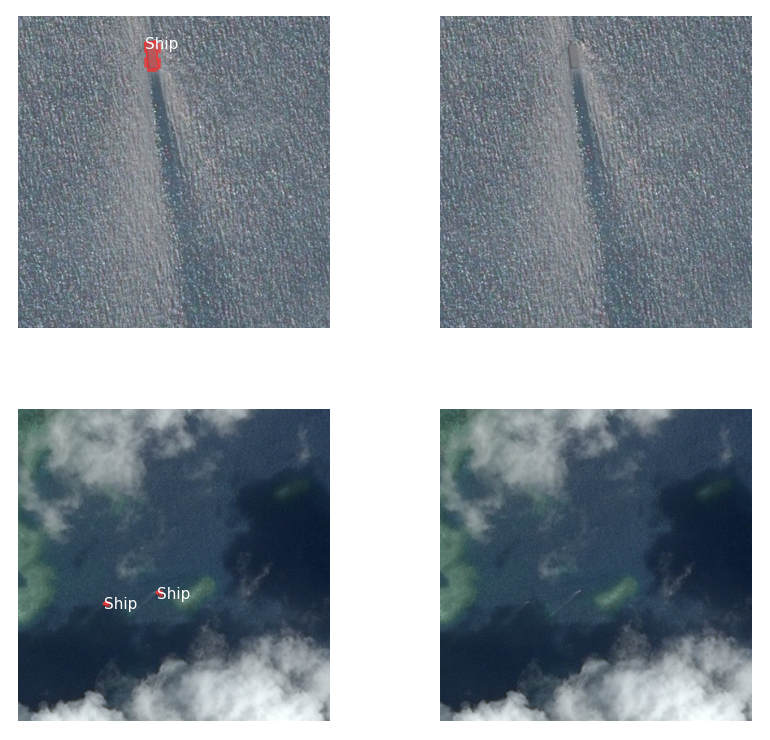

In [83]:
dataset = dataset_val
fig = plt.figure(figsize=(10, 40))

for i in range(4,6,1):

    image_id = random.choice(dataset.image_ids)

    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)

    plt.subplot(8, 2, 2*i + 1)
    visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id,
                                dataset.class_names,
                                colors=get_colors_for_class_ids(gt_class_id), ax=fig.axes[-1])

    plt.subplot(8, 2, 2*i + 2)
    results = model.detect([original_image]) #, verbose=1)
    r = results[0]
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                                dataset.class_names, r['scores'],
                                colors=get_colors_for_class_ids(r['class_ids']), ax=fig.axes[-1])

**METRIKE MODELA**

Ispod prikazana funkcija se koristi za evaluaciju performansi modela na validacionom skupu podataka i daje informacije o preciznosti, prosječnoj preciznosti, presjeku preko unije (IoU).

In [85]:
import numpy as np

# Define a function to calculate AP, mAP, IoU, and Kaggle F2 score
def calculate_ap_map_iou_f2(model, dataset, inference_config):
    APs = []
    IoUs = []
    F2s = []
    gt_bbox_list = []
    gt_class_id_list = []
    gt_mask_list = []
    pred_bbox_list = []
    pred_class_id_list = []
    pred_score_list = []

    # Loop through the dataset
    for image_id in dataset.image_ids:
        original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
            modellib.load_image_gt(dataset, inference_config, image_id, use_mini_mask=False)

        # Append ground truth annotations to lists
        gt_bbox_list.append(gt_bbox)
        gt_class_id_list.append(gt_class_id)
        gt_mask_list.append(gt_mask)

        # Run inference on the image
        results = model.detect([original_image])
        r = results[0]

        # Append predicted results to lists
        pred_bbox = r['rois']
        pred_class_ids = r['class_ids']
        pred_scores = r['scores']
        pred_masks = r['masks']
        pred_bbox_list.append(pred_bbox)
        pred_class_id_list.append(pred_class_ids)
        pred_score_list.append(pred_scores)

        # Compute AP and IoU for the image
        AP, _, _, overlaps = utils.compute_ap(gt_bbox, gt_class_id, gt_mask, pred_bbox, pred_class_ids, pred_scores, pred_masks, iou_threshold=0.5)  # Use IoU threshold of 0.5 for competition evaluation
        APs.append(AP)

        # Calculate IoU
        valid_overlaps = overlaps[~np.isnan(overlaps)]  # Exclude NaN IoU values
        if len(valid_overlaps) > 0:
            IoU = np.mean(valid_overlaps)
            IoUs.append(IoU)

        # Calculate Kaggle F2 score
        TP = len(overlaps) - np.isnan(overlaps).sum()  # True Positives (excluding NaN IoU values)
        FN = len(gt_bbox) - TP  # False Negatives
        FP = len(pred_bbox) - TP  # False Positives
        beta = 2  # F2 score weight for recall (increase weight of recall)
        F2 = ((1 + beta*2) * TP) / ((1 + beta*2) * TP + beta*2 * FN + FP)  # Modified Kaggle F2 score formula
        F2s.append(F2)

    # Calculate mean Average Precision (mAP), mean IoU (excluding NaN values), and mean Kaggle F2 score
    mAP = np.mean(APs)
    mean_IoU = np.nanmean(IoUs) if len(IoUs) > 0 else np.nan
    mean_F2 = np.mean(F2s)

    return APs, mAP, IoUs, mean_IoU, F2s, mean_F2

# Call the function to calculate AP, mAP, IoU, and Kaggle F2 score
APs, mAP, IoUs, mean_IoU, F2s, mean_F2 = calculate_ap_map_iou_f2(model, dataset_val, inference_config)

# Print the results
print("Average Precision (AP) per class:")
for i, AP in enumerate(APs):
    print(f"Class {i}: AP = {AP}")

print("Mean Average Precision (mAP):", mAP)

print("Intersection over Union (IoU) per image:")
for i, IoU in enumerate(IoUs):
    print(f"Image {i}: IoU = {IoU}")

print("Mean IoU (excluding NaN values):", mean_IoU)

print("Kaggle F2 score per image:")
for i, F2 in enumerate(F2s):
    print(f"Image {i}: F2 score = {F2}")

print("Mean Kaggle F2 score:", mean_F2)


Average Precision (AP) per class:
Class 0: AP = 0.0
Class 1: AP = 0.0
Class 2: AP = 0.0
Class 3: AP = 0.0
Class 4: AP = 0.0
Class 5: AP = 0.0
Class 6: AP = 0.0
Class 7: AP = 0.0
Class 8: AP = 0.0
Class 9: AP = 0.0
Class 10: AP = 0.0
Class 11: AP = 0.0
Class 12: AP = 0.0
Class 13: AP = 0.0
Class 14: AP = 0.0
Class 15: AP = 0.0
Class 16: AP = 0.0
Class 17: AP = 0.0
Class 18: AP = 0.0
Class 19: AP = 0.0
Class 20: AP = 0.0
Class 21: AP = 0.0
Class 22: AP = 0.0
Class 23: AP = 0.0
Mean Average Precision (mAP): 0.0
Intersection over Union (IoU) per image:
Image 0: IoU = 0.0
Image 1: IoU = 0.002914636628702283
Image 2: IoU = 0.0
Image 3: IoU = 0.0
Image 4: IoU = 0.0
Image 5: IoU = 0.005521472543478012
Image 6: IoU = 0.0
Mean IoU (excluding NaN values): 0.0012051584
Kaggle F2 score per image:
Image 0: F2 score = 0.0
Image 1: F2 score = 0.0
Image 2: F2 score = 0.0
Image 3: F2 score = 0.0
Image 4: F2 score = 0.0
Image 5: F2 score = 0.0
Image 6: F2 score = 0.0
Image 7: F2 score = 0.0
Image 8: F2 s

**ZAKLJUČAK**

Mask R-CNN je prilično moćan i popularan algoritam za detekciju objekata koji kombinuje prednosti detekcije objekata i semantičke segmentacije, što ga čini vrlo korisnim u mnogim aplikacijama koje koriste koncept računarske vizije.

Poređenje sa drugim algoritmima koji se mogu koristiti za detekciju:

1. **Mask-RCNN vs RCNN**: Mask-RCNN je naprednija i novija verzija RCNN, koja dodatno generiše precizne maske piksela za svaki detektovani objekat, što omogućava bolju samu detekciju ali i razumijevanje rezultata.

2. **Mask-RCNN vs Fast-RCNN**: Fast-RCNN generiše samo okvire(bounding boxes) oko objekata, a Mask-RCNN kao što je ranije pomenuto generiše i maske za svaki objekat. Samim tim, dobijaju se detaljnije i preciznije informacije te bolje performanse samog modela.

3. **Mask-RCNN vs YOLO**: Slično kao u slučaju Fast-RCNN, YOLO (You Only Look Once) algoritam generiše samo okvire i vrši klasifikaciju, što znači da Mask-RCNN ima veću sposobnost raspoznavanja finih detalja na slikama, obzirom da generiše i maske.

4. **Mask-RCNN vs SSD(*Single Shot MultiBox Detector*)**: Ova dva algoritma možda su i najsličnija, obzirom da oba kombinuju detekciju objekata i klasifikaciju, ali i dalje postoje neke razlike. Mask-RCNN dodatno koristi i semantičku segmentaciju. SSD je brži, ali Mask-RCNN pruža detaljnije informacije o obliku objekata.


Što se tiče same konfiguracije modela za trening i dobijenih vrijednosti metrika, svakako postoji prostor za poboljšanja, koja se mogu postići za početak podešavanjem parametara konfiguracije, koji zapravo diktiraju način i postupak odvijanja procesa treninga, recimo, GPU i CPU resursi, koji diktiraju brzinu treniranja. Zatim, ovde konkretno je u pitanju jako veliki set podataka, sa oko 40000 slika, što znatno usporava proces treninga, ali se istovremeno dobija vjerodostojniji model. Obzirom da proces učitavanja slika i treninga traje jako dugo, parametri koji se odnose na ove dvije aktivnosti podešeni su shodno performansama i mogućnostima računara time što nije učitan cjelokupan set podataka, već njegov određeni dio, čime su automatski nekim dijelom opale performanse dobijenog modela.

Zatim, parametar DETECTION_MIN_CONFIDENCE je parametar koji određuje minimalnu sigurnost (konfidenciju) detekcije koja će biti prihvaćena. Prihvaćene detekcije imaju sigurnost veću ili jednaku od DETECTION_MIN_CONFIDENCE. Što je vrijednost veća, znači da su prihvatane samo detekcije sa visokom pouzdanošću, što povećava preciznost modela.

Vrijednosti većine ovih parametara su skalirane shodno mogućnostima računara na kom se obavlja treniranje, tako da su neke vrijednosti možda izrazito male, čime je opao kvalitet treninga i preciznost dobijenog modela, što znači da bi se podešavanjem ovih vrijednosti, na računaru sa boljim performansama moglo iskoristiti u svrhu poboljšanja modela.


**REFERENCE**

[1] IBM. "Computer Vision." IBM. Dostupno na: https://www.ibm.com/topics/computer-vision

[2] "Object Detection." Encord Blog. Dostupno na: https://encord.com/blog/object-detection

[3] Augmented Startups. "Object Detection vs Classification in Computer Vision.". Dostupno na: https://augmentedstartups.medium.com/object-detection-vs-classification-in-computer-vision-123c437e33be

[4] TASQ.AI. "What is the difference between semantic segmentation and object detection?". Dostupno na: https://www.tasq.ai/tasq-question/what-is-the-difference-between-semantic-segmentation-and-object-detection/#:~:text=What%20is%20the%20difference%20between%20semantic%20segmentation%20and%20object%20detection%3F,-Object%20Detection%20%7C%20December&text=Semantic%20segmentation%20divides%20an%20image's,bounding%20box%20around%20the%20item

[5] He, K., Gkioxari, G., Dollár, P., & Girshick, R. (2017). Mask R-CNN. In Proceedings of the IEEE international conference on computer vision (pp. 2961-2969).

[6] NumPy. "NumPy Documentation.". Dostupno na: https://numpy.org/doc/stable/

[7] Pandas. "Pandas Documentation.". Dostupno na: https://pandas.pydata.org/docs/getting_started/overview.html

[8] scikit-image. "scikit-image Documentation.". Dostupno na: https://scikit-image.org/

[9] Matplotlib. "Matplotlib Documentation.". Dostupno na: https://matplotlib.org/

[10] Smith, L. N. (2017). "Cyclical Learning Rates for Training Neural Networks." IEEE Winter Conference on Applications of Computer Vision (WACV). Str. 464-472. Dostupno na: https://openaccess.thecvf.com/content_WACV_2017/papers/Smith_Cyclical_Learning_Rates_WACV_2017_paper.pdf


